<a href="https://colab.research.google.com/github/MadhusudhanReddy717/First_one/blob/main/RNN(AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input: [0.7 0.8 0.9 1. ]
Predicted next value: 1.0439


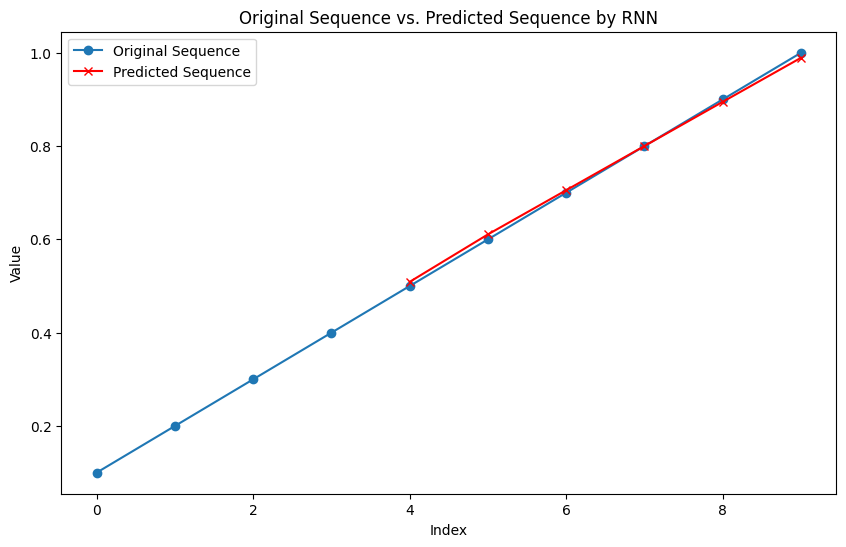

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense

def create_dataset(sequence, window_size):
    X, y = [], []
    for i in range(len(sequence) - window_size):
        X.append(sequence[i:i + window_size])
        y.append(sequence[i + window_size])
    return np.array(X), np.array(y)

sequence = np.linspace(0.1, 1.0, 10)
window_size = 4

X, y = create_dataset(sequence, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    SimpleRNN(10, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

test_input = np.array([0.7, 0.8, 0.9, 1.0]).reshape(1, window_size, 1)
predicted_output = model.predict(test_input, verbose=0)

print(f"Input: {test_input.flatten()}")
print(f"Predicted next value: {predicted_output[0][0]:.4f}")
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense

def create_dataset(sequence, window_size):
    X, y = [], []
    for i in range(len(sequence) - window_size):
        X.append(sequence[i:i + window_size])
        y.append(sequence[i + window_size])
    return np.array(X), np.array(y)

sequence = np.linspace(0.1, 1.0, 10)
window_size = 4

X, y = create_dataset(sequence, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    SimpleRNN(10, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

predictions = []
for i in range(len(sequence) - window_size):
    input_seq = sequence[i:i + window_size].reshape(1, window_size, 1)
    prediction = model.predict(input_seq, verbose=0)
    predictions.append(prediction[0][0])

# Plot the sequence and predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(sequence)), sequence, marker='o', label="Original Sequence")
plt.plot(range(window_size, len(sequence)), predictions, marker='x', color='red', label="Predicted Sequence")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Original Sequence vs. Predicted Sequence by RNN")
plt.legend()
plt.show()

